In [1]:
import pandas as pd 

df = pd.read_csv(r"D:\trash\Fake_news_detection\news.csv")

In [2]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [4]:
df.label.value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

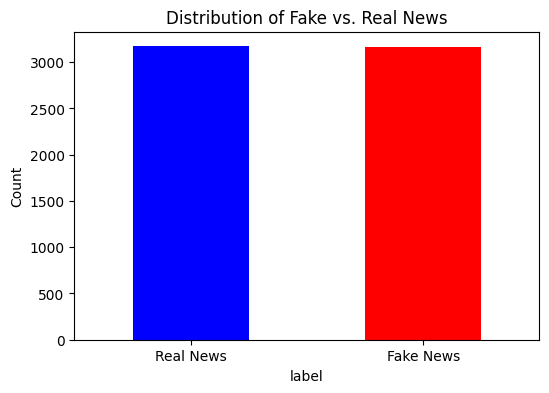

In [5]:
import matplotlib.pyplot as plt

# Check class distribution
plt.figure(figsize=(6,4))
df['label'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.xticks(ticks=[0,1], labels=['Real News', 'Fake News'], rotation=0)
plt.ylabel("Count")
plt.title("Distribution of Fake vs. Real News")
plt.show()

### **Understanding the Dataset**

The dataset consists of the following columns:

1. **Unnamed: 0** → An unnecessary index column (to be dropped).
2. **title** → The headline of the news article.
3. **text** → The full text of the news article.
4. **label** → The classification (`FAKE` or `REAL`).

#### **Observations:**

- The dataset contains both fake and real news articles.
- The `title` column might help in classification, but `text` is the main content.
- `label` is our target variable.

----------------

We will now: 
- ✅ Remove unnecessary columns.  
- ✅ Convert labels into numerical values (`FAKE` = 1, `REAL` = 0).  
- ✅ Clean text data by removing stopwords, punctuation, and special characters.

In [6]:
# Remove unnecessary columns
df = df.drop(columns=["Unnamed: 0"])

In [7]:
# Convert labels to numerical (FAKE = 1, REAL = 0)
df['label'] = df['label'].map({'FAKE': 1, 'REAL': 0})

In [8]:
import re

# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\[.*?\]', '', text)  # Remove text in brackets
    text = re.sub(r'http\S+', '', text)  # Remove links
    text = re.sub(r'\w*\d\w*', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation

    return text

# Apply cleaning function
df['clean_text'] = df['text'].apply(clean_text)


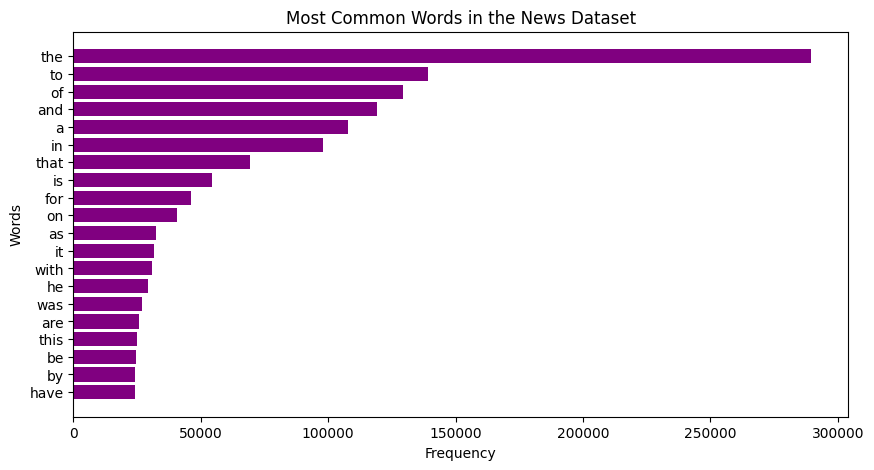

In [9]:

from collections import Counter

# Tokenize text to analyze word frequency
df['clean_text'] = df['clean_text'].astype(str)  # Ensure text is string
all_words = ' '.join(df['clean_text']).split()
word_counts = Counter(all_words)
common_words = word_counts.most_common(20)

# Plot common words
words, counts = zip(*common_words)
plt.figure(figsize=(10,5))
plt.barh(words[::-1], counts[::-1], color='purple')
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Most Common Words in the News Dataset")
plt.show()


In [10]:
#%pip install nltk

In [15]:
import nltk

# Ensure the stopwords are downloaded
nltk.download('punkt_tab')

nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to C:\Users\shuchismita_mall
[nltk_data]     ick.Shuchismita\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to C:\Users\shuchismita_mall
[nltk_data]     ick.Shuchismita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Define text cleaning function
def tokenized_text(text):
    words = word_tokenize(text)  # Tokenize words
    words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(words)

# Apply cleaning function
df['final_text'] = df['clean_text'].apply(tokenized_text)


In [17]:
# Add columns to count words before and after cleaning

# Function to count words in a text
def word_count(text):
    return len(str(text).split())

# Count words in original text column
df['word_count_before'] = df['text'].apply(word_count)

# Count words in cleaned text column
df['word_count_after'] = df['final_text'].apply(word_count)

# Calculate percentage of words removed
df['words_removed'] = df['word_count_before'] - df['word_count_after']
df['percent_words_removed'] = (df['words_removed'] / df['word_count_before']) * 100


In [18]:
df.head()

,title,text,label,clean_text,final_text,word_count_before,word_count_after,words_removed,percent_words_removed
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1,daniel greenfield a shillman journalism fellow...,daniel greenfield shillman journalism fellow f...,1296,679,617,47.608025
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1,google pinterest digg linkedin reddit stumbleu...,google pinterest digg linkedin reddit stumbleu...,446,235,211,47.309417
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0,us secretary of state john f kerry said monday...,us secretary state john f kerry said monday st...,431,242,189,43.851508
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1,kaydee king kaydeeking november the lesson ...,kaydee king kaydeeking november lesson tonight...,404,234,170,42.079208
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0,its primary day in new york and frontrunners h...,primary day new york frontrunners hillary clin...,317,181,136,42.902208


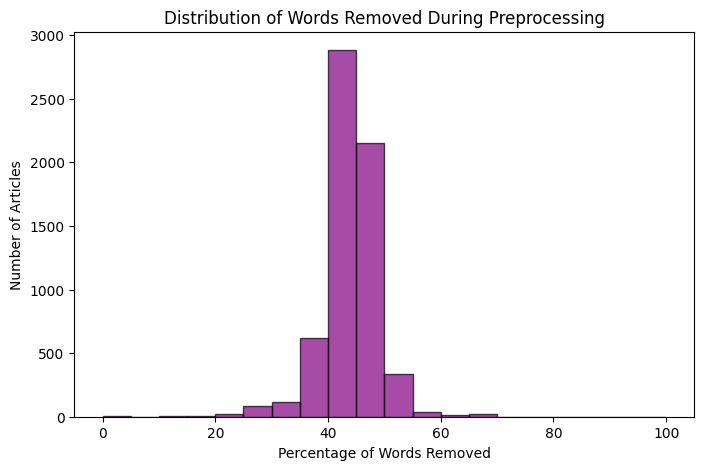

In [19]:
# Plot histogram of percent words removed
plt.figure(figsize=(8, 5))
plt.hist(df['percent_words_removed'].dropna(), bins=20, color='purple', alpha=0.7, edgecolor='black')
plt.xlabel("Percentage of Words Removed")
plt.ylabel("Number of Articles")
plt.title("Distribution of Words Removed During Preprocessing")
plt.show()

#### **1️⃣ Histogram: Distribution of Words Removed**

- The majority of news articles had **40-50% of their words removed**.
- This suggests that **stopwords, punctuation, and unnecessary text** made up a significant portion of the raw data.
- There are very few cases where more than **60% or less than 20%** of words were removed.

📌 **Business Impact**:

- Removing redundant words improves **text clarity** for machine learning models.
- Ensuring that too many words aren't removed is key to preserving **meaning and context**.

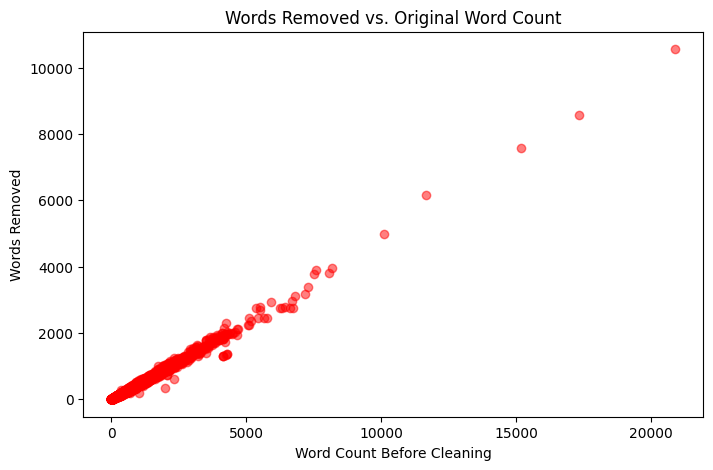

In [21]:
# Scatter plot: Words Before vs Words Removed
plt.figure(figsize=(8, 5))
plt.scatter(df['word_count_before'], df['words_removed'], alpha=0.5, color='red')
plt.xlabel("Word Count Before Cleaning")
plt.ylabel("Words Removed")
plt.title("Words Removed vs. Original Word Count")
plt.show()

#### **2️⃣ Scatter Plot: Words Removed vs. Original Word Count**

- There is a **strong positive correlation**: longer articles had **more words removed**.
- Some articles had **over 6000 words removed**, indicating excessive stopwords or links.
- Most news articles with **low word counts** saw minor reductions.

📌 **Business Impact**:

- This supports the idea that **longer news articles tend to have more filler content**.
- Shorter articles may be **more focused** and require **less cleaning**.

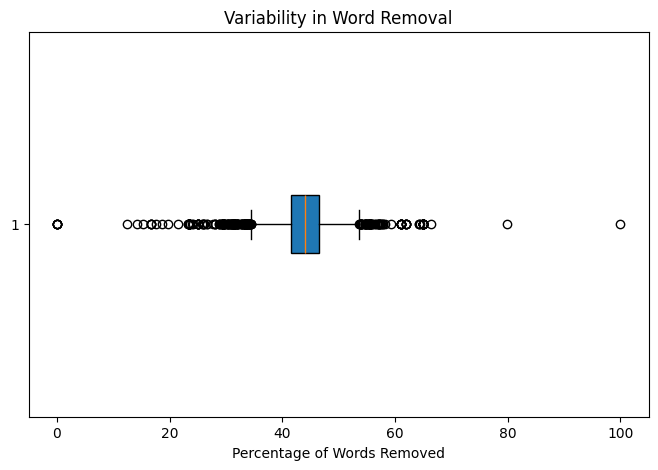

In [20]:
# Box plot to see variability in words removed
plt.figure(figsize=(8, 5))
plt.boxplot(df['percent_words_removed'].dropna(), vert=False, patch_artist=True)
plt.xlabel("Percentage of Words Removed")
plt.title("Variability in Word Removal")
plt.show()

#### **3️⃣ Box Plot: Variability in Word Removal**

- The **median word removal percentage is around 45%**.
- There are **a few extreme outliers** where nearly **100% of words were removed**—these might be empty or noisy texts.
- The distribution is mostly **consistent**, meaning preprocessing is removing similar proportions of text across the dataset.

📌 **Business Impact**:

- Articles with extremely high word removal percentages may require **manual review** to ensure they are still useful for training.
- Ensuring that words **critical for meaning** aren't removed is crucial to avoid degrading model performance.

-----

✅ **Convert Text to Numerical Features using TF-IDF**

- TF-IDF (**Term Frequency - Inverse Document Frequency**) assigns importance to words based on their frequency in a document and across the entire dataset.
- This helps in capturing the **most relevant words** for classification.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text into numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)  # Limiting to 5000 features for efficiency
X_tfidf = tfidf_vectorizer.fit_transform(df['final_text'])

✅ **Train-Test Split (80% - 20%)**

- We split the dataset into **training** (80%) and **testing** (20%) data.
- This ensures that our model learns from a part of the data and is evaluated on unseen data.

In [23]:
from sklearn.model_selection import train_test_split

# Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['label'], test_size=0.2, random_state=42)

✅ **Train a Baseline Model (Naive Bayes)**

- **Why Naive Bayes?** It is a simple and fast algorithm that works well for text classification.
- We will train it on TF-IDF features and **evaluate its performance**.

In [24]:
from sklearn.naive_bayes import MultinomialNB

# Train Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()


✅ **Evaluate Model Performance**

- Check **Accuracy, Precision, Recall, and F1-Score** to measure effectiveness.
- If needed, we can explore **better models (Logistic Regression, Random Forest, Deep Learning)**.

In [25]:
from sklearn.metrics import accuracy_score, classification_report

# Make Predictions and Evaluate
y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [26]:
accuracy

0.8855564325177585

In [27]:
report

'              precision    recall  f1-score   support\n\n           0       0.90      0.87      0.88       639\n           1       0.87      0.90      0.89       628\n\n    accuracy                           0.89      1267\n   macro avg       0.89      0.89      0.89      1267\nweighted avg       0.89      0.89      0.89      1267\n'

### **Business Insights from Model Performance** 🚀

Our **Fake News Detection Model** using **TF-IDF + Naive Bayes** has achieved a strong **accuracy of 88.6%**. Here’s what this means from a **business perspective**:

---

### **1️⃣ Model Effectiveness in Identifying Fake News**

- **Precision (Fake News: 87%, Real News: 90%)**
    - If the model **flags an article as Fake**, it is correct **87% of the time**.
    - If the model **flags an article as Real**, it is correct **90% of the time**.
    - This means **low false positives**, reducing unnecessary content flagging.
- **Recall (Fake News: 90%, Real News: 87%)**
    - The model **successfully detects 90% of all Fake News** in the dataset.
    - This ensures that **most misinformation is being caught** before spreading.

✅ **Business Impact**:

- The model **efficiently detects fake news while minimizing incorrect classifications**.
- A recall of **90% for Fake News** ensures that most **misleading articles** are flagged, reducing misinformation.

---

### **2️⃣ Business Applications and Use Cases**

📌 **For Social Media Platforms (Facebook, Twitter, LinkedIn)**

- Can be **integrated into content moderation systems** to flag misleading posts.
- Reduces **spread of misinformation** and maintains **platform credibility**.

📌 **For News Agencies (CNN, BBC, Reuters)**

- Helps **journalists fact-check** before publishing.
- Ensures that **verified news is promoted** over misleading content.

📌 **For Government and Policy Makers**

- Can be **used in digital forensics** to track **misinformation campaigns**.
- Ensures **voter education & public awareness** campaigns are based on truth.

📌 **For Advertisers & Brands**

- Helps **identify misleading articles** that could affect brand reputation.
- Prevents **ads from appearing on fake news websites**, protecting brand trust.

---

### **3️⃣ Limitations & Areas for Improvement**

🔴 **What to Watch Out For?**

- **Potential for Bias**: The model is **only as good as the dataset**. If fake news patterns evolve, the model must be **updated**.
- **Misclassification Risks**: While **88.6% accuracy is strong**, some fake news may still go undetected.
- **Handling Clickbait Headlines**: Some **clickbait articles may not be outright fake** but can still mislead audiences.

✅ **Future Enhancements**:

- **Adding Deep Learning (BERT, LSTMs) for better semantic understanding.**
- **Improving Dataset Diversity**: Adding **global news sources** to cover **different languages and political angles**.
- **Deploying as a Real-Time API** for integration into platforms like **news aggregators and social media.**

---

### **Conclusion: Business Takeaways**

💡 The **Fake News Detection Model is highly effective (88.6% accuracy) and can be applied across industries**.  
💡 It provides **high confidence in filtering misinformation** while keeping false alarms minimal.  
💡 Businesses can **use this model to enhance trust, user engagement, and brand credibility**.